Point Pattern Analysis
https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html

In [1]:
%matplotlib inline

import numpy
import pandas
import geopandas
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
db = pandas.read_csv('tokyo/tokyo_clean.csv')

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               10000 non-null  object 
 1   longitude             10000 non-null  float64
 2   latitude              10000 non-null  float64
 3   date_taken            10000 non-null  object 
 4   photo/video_page_url  10000 non-null  object 
 5   x                     10000 non-null  float64
 6   y                     10000 non-null  float64
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [4]:
db.head()

user_id   longitude   latitude             date_taken  \
0     10727420@N00  139.700499  35.674000  2010-04-09 17:26:25.0   
1      8819274@N04  139.766521  35.709095  2007-02-10 16:08:40.0   
2     62068690@N00  139.765632  35.694482  2008-12-21 15:45:31.0   
3  49503094041@N01  139.784391  35.548589  2011-11-11 05:48:54.0   
4     40443199@N00  139.768753  35.671521  2006-04-06 16:42:49.0   

                                photo/video_page_url             x  \
0  http://www.flickr.com/photos/10727420@N00/4545...  1.555139e+07   
1  http://www.flickr.com/photos/8819274@N04/26503...  1.555874e+07   
2  http://www.flickr.com/photos/62068690@N00/3125...  1.555864e+07   
3  http://www.flickr.com/photos/49503094041@N01/6...  1.556073e+07   
4  http://www.flickr.com/photos/40443199@N00/2482...  1.555899e+07   

              y  
0  4.255856e+06  
1  4.260667e+06  
2  4.258664e+06  
3  4.238684e+06  
4  4.255517e+06

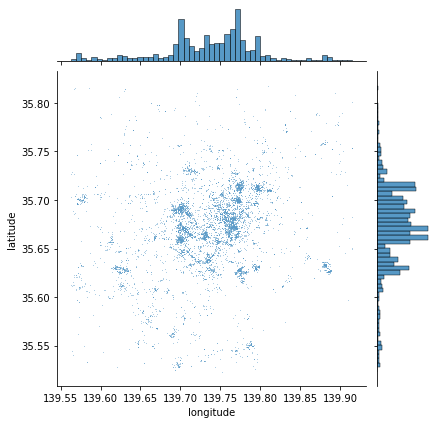

In [5]:
# Generate scatter plot
seaborn.jointplot(x='longitude', y='latitude', data=db, s=0.5);

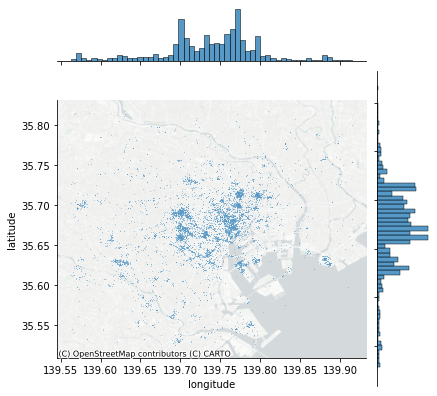

In [6]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='longitude', y='latitude', data=db, s=0.5
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
);

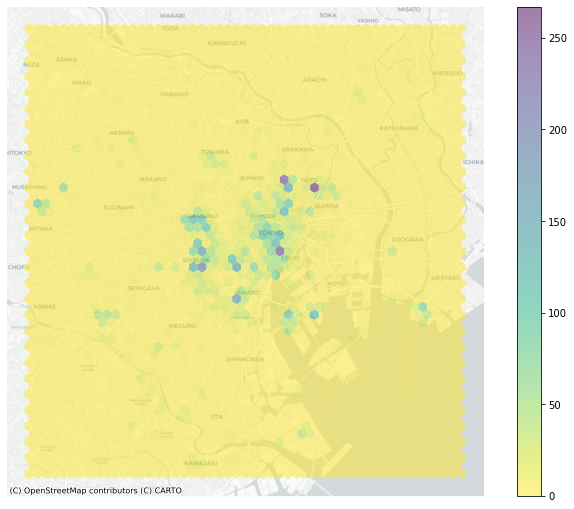

In [7]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    db['x'], 
    db['y'],
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

C:\ProgramData\Anaconda3\envs\Geo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


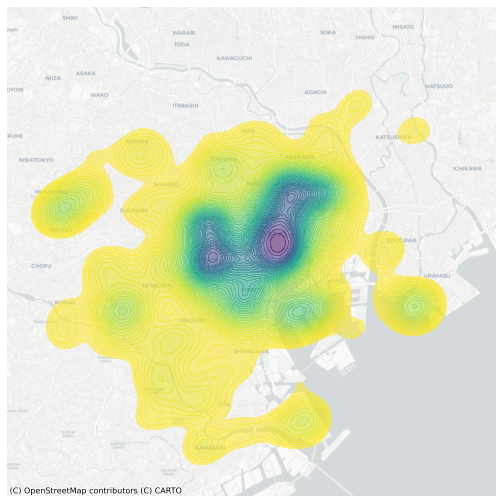

In [8]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    db['x'], 
    db['y'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()

In [9]:
from pointpats import centrography

In [10]:
mean_center = centrography.mean_center(db[['x', 'y']])
med_center = centrography.euclidean_median(db[['x', 'y']])

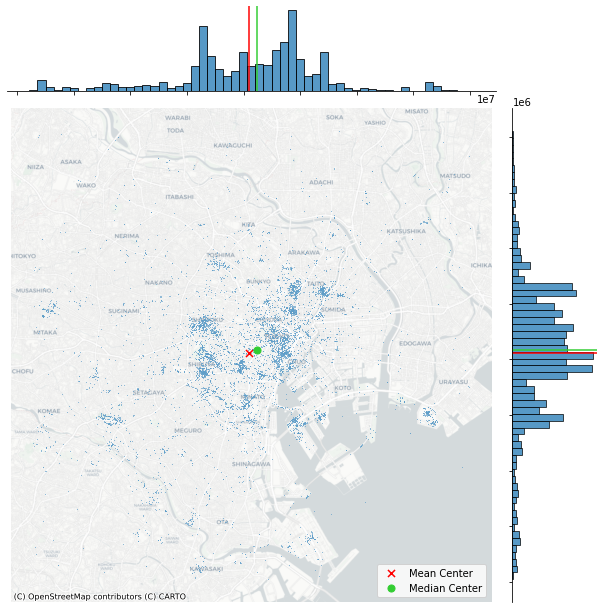

In [11]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='x', y='y', data=db, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint, 
    source=contextily.providers.CartoDB.Positron
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

In [12]:
centrography.std_distance(db[['x','y']])

8778.218564382098

In [13]:
major, minor, rotation = centrography.ellipse(db[['x','y']])

In [14]:
print(major, minor, rotation)

7961.472887138463 8785.957053230712 1.180298293539531


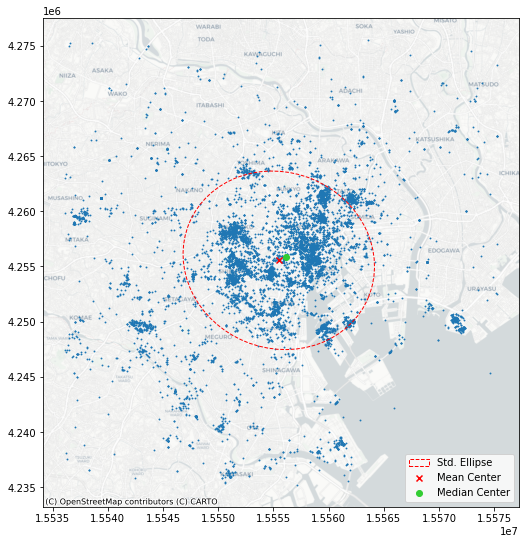

In [15]:
from matplotlib.patches import Ellipse

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(db['x'], db['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
plt.show()

In [16]:
user = db.query('user_id == "95795770@N00"')
coordinates = user[['x','y']].values

In [17]:
convex_hull_vertices = centrography.hull(coordinates)

In [18]:
convex_hull_vertices

array([[15537916.97274838,  4259950.19947175],
       [15550888.47641307,  4236478.38098534],
       [15561070.53627746,  4239555.81249334],
       [15572223.74737953,  4250125.30852468],
       [15571247.92072323,  4267392.63935002],
       [15571136.60123244,  4267407.72904653],
       [15539499.60194899,  4262787.14125788]])

In [19]:
import libpysal
alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(coordinates, return_circles=True)

In [20]:
alpha

8652.470244387281

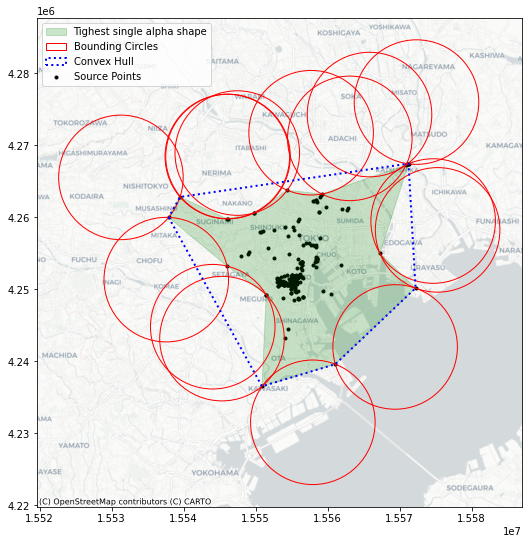

In [21]:
from descartes import PolygonPatch #to plot the alpha shape easily
f,ax = plt.subplots(1,1, figsize=(9,9))

# Plot a green alpha shape
ax.add_patch(
    PolygonPatch(
        alpha_shape, 
        edgecolor='green', 
        facecolor='green', 
        alpha=.2, 
        label = 'Tighest single alpha shape'
    )
)

# Include the points for our prolific user in black
ax.scatter(
    *coordinates.T, color='k', marker='.', label='Source Points'
)

# plot the circles forming the boundary of the alpha shape
for i, circle in enumerate(circs):
    # only label the first circle of its kind
    if i == 0:
        label = 'Bounding Circles'
    else:
        label = None
    ax.add_patch(
        plt.Circle(
            circle, 
            radius=alpha, 
            facecolor='none', 
            edgecolor='r', 
            label=label
        )
    )

# add a blue convex hull
ax.add_patch(
    plt.Polygon(
        convex_hull_vertices, 
        closed=True, 
        edgecolor='blue', 
        facecolor='none', 
        linestyle=':', 
        linewidth=2,
        label='Convex Hull'
    )
)

# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)

plt.legend();

In [23]:
# Commented out until functionality is added to pointpats
#min_rot_rect = centrography.minimum_rotated_rectangle(coordinates)

In [24]:
min_rect_vertices = centrography.minimum_bounding_rectangle(coordinates)

In [25]:
(center_x, center_y), radius = centrography.minimum_bounding_circle(coordinates)

In [26]:
from matplotlib.patches import Polygon, Circle, Rectangle
from descartes import PolygonPatch

# Make a purple alpha shape
alpha_shape_patch = PolygonPatch(
    alpha_shape, 
    edgecolor='purple', 
    facecolor='none', 
    linewidth=2,
    label='Alpha Shape'
)

# a blue convex hull
convex_hull_patch = Polygon(
    convex_hull_vertices, 
    closed=True, 
    edgecolor='blue', facecolor='none', 
    linestyle=':', linewidth=2,
    label='Convex Hull'
)

# a green minimum rotated rectangle
"""
# Commented out until functionality is added to pointpats
min_rot_rect_patch = Polygon(
    min_rot_rect, 
    closed=True, 
    edgecolor='green', 
    facecolor='none', 
    linestyle='--', 
    label='Min Rotated Rectangle', 
    linewidth=2
)
"""

# compute the width and height of the 
min_rect_width = min_rect_vertices[2] - min_rect_vertices[0]
min_rect_height = min_rect_vertices[2] - min_rect_vertices[0]

# a goldenrod minimum bounding rectangle
min_rect_patch = Rectangle(
    min_rect_vertices[0:2], 
    width = min_rect_width,
    height = min_rect_height,
    edgecolor='goldenrod', facecolor='none', 
    linestyle='dashed', linewidth=2, 
    label='Min Bounding Rectangle', 
)

# and a red minimum bounding circle
circ_patch = Circle(
    (center_x, center_y), 
    radius=radius,
    edgecolor='red', 
    facecolor='none', 
    linewidth=2,
    label='Min Bounding Circle'
)

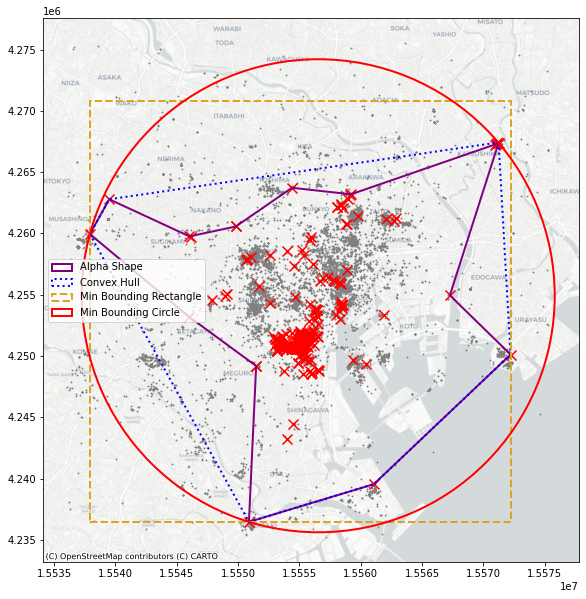

In [27]:
f,ax = plt.subplots(1, figsize=(10,10))

ax.add_patch(alpha_shape_patch)
ax.add_patch(convex_hull_patch)
# Commented out until functionality is added to pointpats
#ax.add_patch(min_rot_rect_patch)
ax.add_patch(min_rect_patch)
ax.add_patch(circ_patch)

ax.scatter(db.x, db.y, s=.75, color='grey')
ax.scatter(user.x, user.y, s=100, color='r', marker='x')
ax.legend(ncol=1, loc='center left')

# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
plt.show()

In [28]:
from pointpats import distance_statistics, QStatistic, random, PointPattern

In [29]:
random_pattern = random.poisson(coordinates, size=len(coordinates))

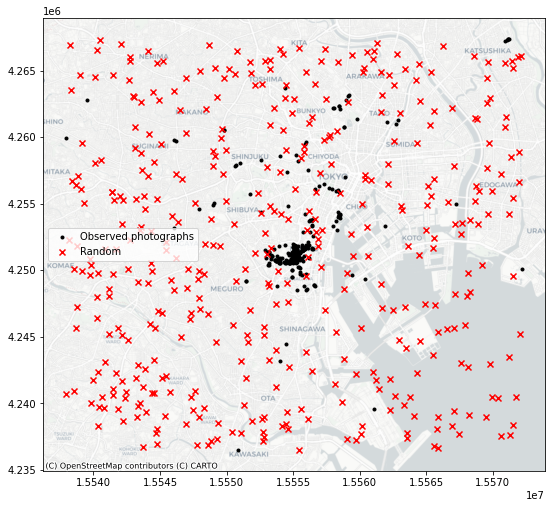

In [30]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed photographs')
plt.scatter(*random_pattern.T, color='r', marker='x', label='Random')
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()

In [31]:
random_pattern_ashape = random.poisson(alpha_shape, size=len(coordinates))

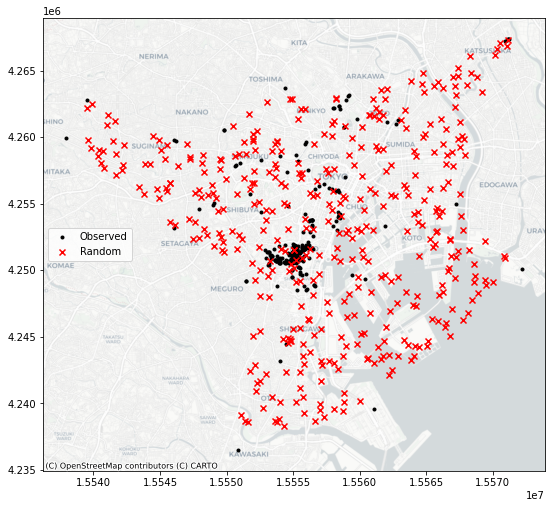

In [32]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed')
plt.scatter(*random_pattern_ashape.T, color='r', marker='x', label='Random')
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()

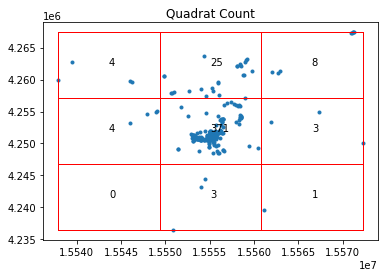

In [33]:
qstat = QStatistic(coordinates)
qstat.plot()

In [34]:
qstat.chi2_pvalue

0.0

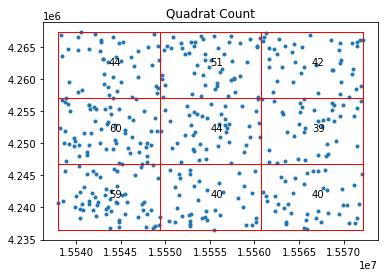

In [35]:
qstat_null = QStatistic(random_pattern)
qstat_null.plot()

In [36]:
qstat_null.chi2_pvalue

0.1784029067594224

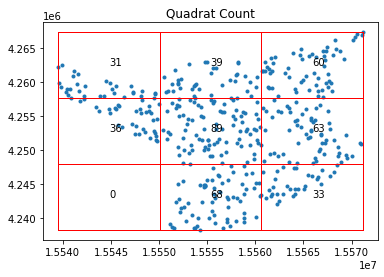

In [37]:
qstat_null_ashape = QStatistic(random_pattern_ashape)
qstat_null_ashape.plot()

In [38]:
qstat_null_ashape.chi2_pvalue

1.0446131884045293e-21

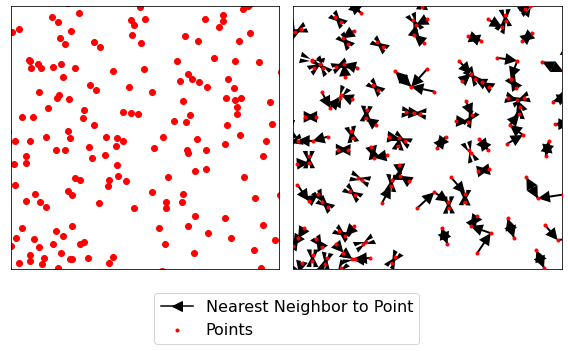

In [39]:
# this code should be hidden in the book, and only the plot visible!
f,ax = plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)
ax[0].scatter(*random_pattern.T, color='red')
ax[1].scatter(*random_pattern.T, color='red',
              zorder=100, marker='.', label='Points')
nn_ixs, nn_ds = PointPattern(random_pattern).knn(1)
first = True
for coord, nn_ix, nn_d in zip(random_pattern, nn_ixs, nn_ds):
    dx, dy = random_pattern[nn_ix].squeeze() - coord
    arrow = ax[1].arrow(*coord, dx,dy, 
                length_includes_head=True, 
                overhang=0, head_length=300*3,
                head_width=300*3, width=50*3,
                linewidth=0, facecolor='k',
                head_starts_at_zero=False)
    if first:
        plt.plot((1e100, 1e101), (0,1), color='k', 
                 marker='<', markersize=10,
                 label='Nearest Neighbor to Point')
    first = False

ax[0].axis([1.554e7, 1.556e7, 4240000, 4260000])
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xticks([])
ax[0].set_yticks([])
f.tight_layout()
ax[1].legend(bbox_to_anchor = (.5,-.06), fontsize=16)
plt.show()

In [40]:
g_test = distance_statistics.g_test(
    coordinates, support=40, keep_simulations=True
)

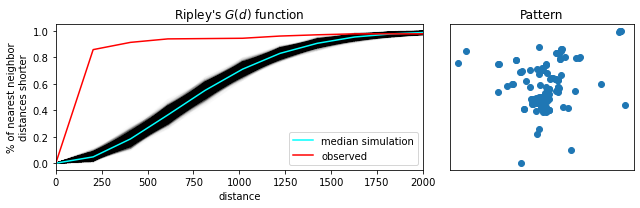

In [42]:
f,ax = plt.subplots(1,2,figsize=(9,3), 
                    gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, numpy.median(g_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

In [43]:
f_test = distance_statistics.f_test(
    coordinates, support=40, keep_simulations=True
)

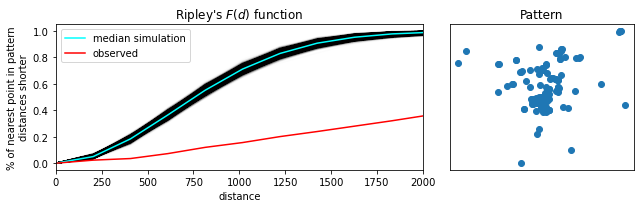

In [44]:
f,ax = plt.subplots(
    1,2,figsize=(9,3), gridspec_kw=dict(width_ratios=(6,3))
)

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, numpy.median(f_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

In [45]:
# Define DBSCAN
clusterer = DBSCAN()
# Fit to our data
clusterer.fit(db[["x", "y"]])

DBSCAN()

In [46]:
# Print the first 5 elements of `cs`
clusterer.core_sample_indices_[:5]

array([ 1, 22, 30, 36, 42], dtype=int64)

In [47]:
clusterer.labels_[:5]

array([-1,  0, -1, -1, -1], dtype=int64)

In [48]:
lbls = pandas.Series(clusterer.labels_, index=db.index)

In [49]:
lbls

0        -1
1         0
2        -1
3        -1
4        -1
       ... 
9995     -1
9996     -1
9997    146
9998     -1
9999     -1
Length: 10000, dtype: int64

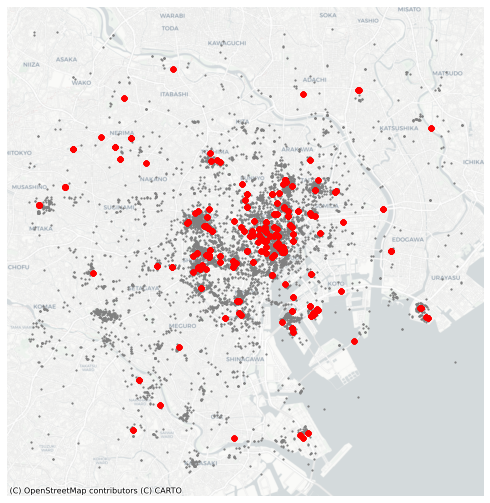

In [50]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = db.loc[lbls==-1, ['x', 'y']]
# Plot noise in grey
ax.scatter(noise['x'], noise['y'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(db.loc[db.index.difference(noise.index), 'x'], \
           db.loc[db.index.difference(noise.index), 'y'], \
          c='red', linewidth=0)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

In [51]:
# Obtain the number of points 1% of the total represents
minp = numpy.round(db.shape[0] * 0.01)
minp

100.0

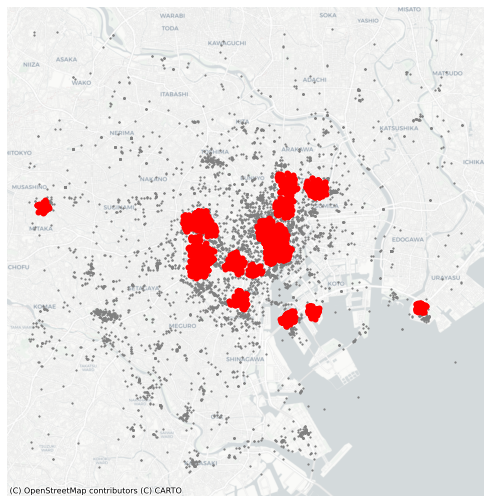

In [52]:
# Rerun DBSCAN
clusterer = DBSCAN(eps=500, min_samples=minp)
clusterer.fit(db[['x', 'y']])
# Turn labels into a Series
lbls = pandas.Series(clusterer.labels_, index=db.index)
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = db.loc[lbls==-1, ['x', 'y']]
# Plot noise in grey
ax.scatter(noise['x'], noise['y'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (db) and substract from
#      it the index of those that are noise
ax.scatter(
    db.loc[db.index.difference(noise.index), 'x'],
    db.loc[db.index.difference(noise.index), 'y'],
    c='red', 
    linewidth=0
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()